# Лабораторная работа 2. Решающие деревья и случайные леса.

ФИО:

Группа: 

In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### I. Решающие деревья своими руками
#### Задача 1.
В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__1__

Реализуйте следующую функцию:

In [4]:
def find_best_split(feature_vector, target_vector):
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    thresholds = np.array(list(set(feature_vector)))
    if len(thresholds) <= 1:
        return [], [], -1, -1
    thresholds.sort()
    thresholds = thresholds[:-1]
    feature_target = pd.DataFrame(np.vstack((feature_vector, target_vector)).T)
    df = pd.DataFrame(feature_target)
    ginis = np.array(list(map(lambda v: gini(feature_target, v), thresholds)))
    thresholds_ginis = pd.DataFrame(np.vstack((thresholds, ginis)).T)
    max_gini = thresholds_ginis[1].max()
    max_thresholds = np.array(thresholds_ginis[thresholds_ginis[1]
                              == max_gini])[0][0]
    return thresholds, ginis, max_thresholds, max_gini

def gini(feature_target, value):
    r = len(feature_target)
    zl = feature_target[feature_target[0] <= value]
    rl = len(zl)
    rl0 = len(zl[zl[1] == 0])
    rl1 = len(zl[zl[1] == 1])
    hrl = 1 - (rl0 / rl) ** 2 - (rl1 / rl) ** 2

    zr = feature_target[feature_target[0] > value]
    rr = len(zr)
    rr0 = len(zr[zr[1] == 0])
    rr1 = len(zr[zr[1] == 1])
    hrr = 1 - (rr0 / rr) ** 2 - (rr1 / rr) ** 2

    qr = -1 * (rl / r) * hrl - (rr / r) * hrr

    return qr

    

Параметры:
* feature_vector: вещественнозначный вектор значений признака (np.array)
* target_vector: вектор классов объектов (np.array). len(feature_vector)==len(target_vector).

Возвращаемые значения:
* thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно разделить на две различные подвыборки, или поддерева (np.array)
* ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds. (np.array, len(ginis)==len(thresholds))
* оптимальный порог (число)
* оптимальное значение критерия Джини (число)

Под критерием Джини здесь подразумевается следующая функция:
$$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r),$$
$R$ - множество объектов, $R_l$ и $R_r$ - объекты, попавшие в левое и правое поддерево, $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ - доля объектов класса 1 и 0 соответственно.

Указания:
* Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
* За наличие в функции циклов балл будет снижен. Векторизуйте! :)

__2__
Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах,а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог - значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака - класс" для всех пяти признаков.

__3__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

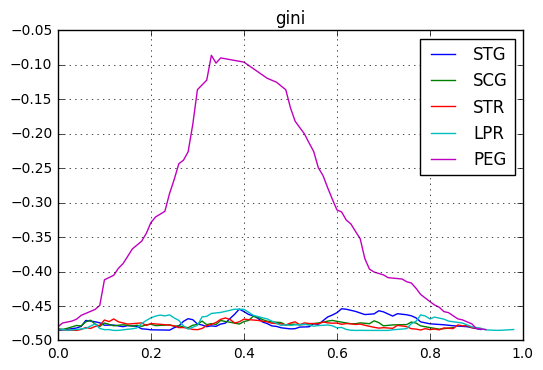

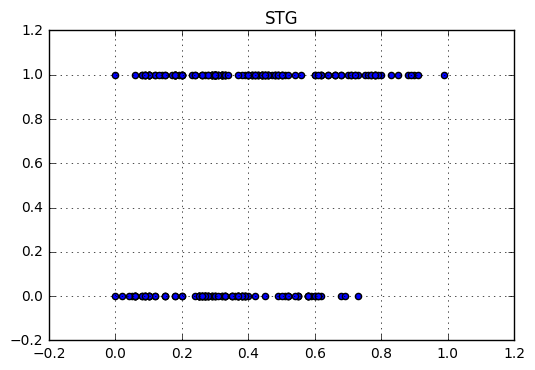

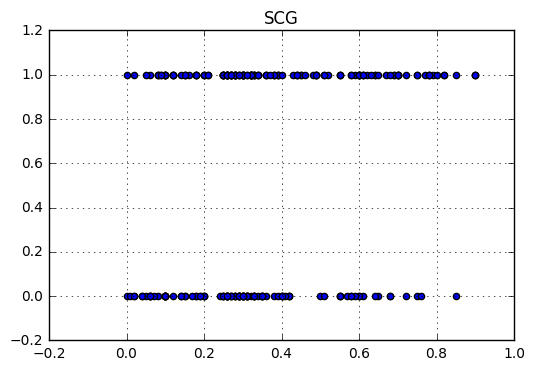

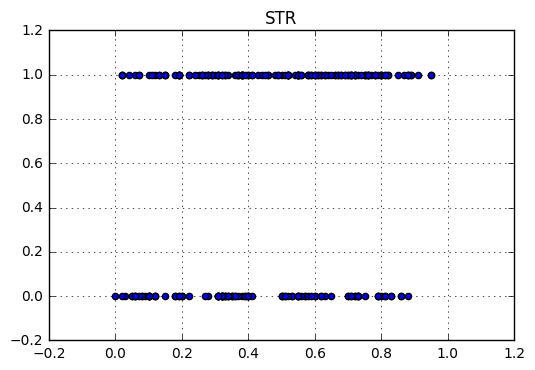

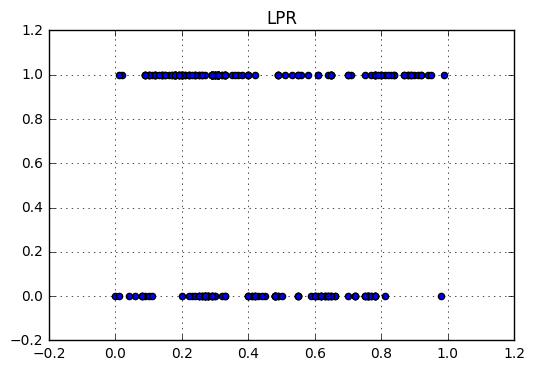

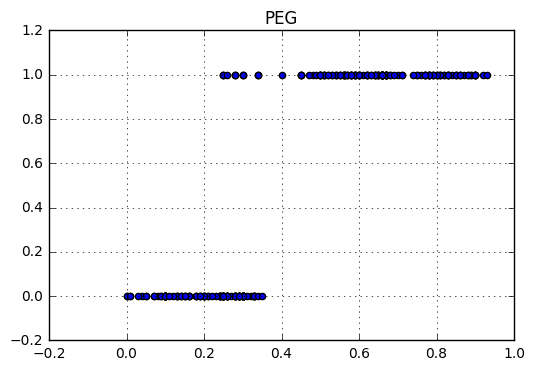

feature | max_thresholds | max_gini
STG                 0.61      -0.45
SCG                 0.42      -0.47
STR                 0.36      -0.47
LPR                 0.38      -0.45
PEG                 0.33      -0.09


In [5]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def f_plot(xarray, yarray, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for x, y, label in zip(xarray, yarray, labels):
        ax.plot(x, y, label = label)

    ax.grid(True)
    ax.legend()

students = pd.read_csv('students.csv');

res = np.array(list(map(lambda a: find_best_split(np.array(students[a]),
               np.array(students[students.columns[-1]])),
               students.columns[:-1])))

f_plot(res[:, 0], res[:, 1], labels = students.columns[:-1])
plt.title('gini')
plt.show()

for column in students.columns[:-1]:
    plt.scatter(students[column], students[students.columns[-1]])
    plt.title(column)
    plt.grid()
    plt.show()

print("feature | max_thresholds | max_gini")
for a in list(zip(students.columns[:-1], res[:, 2], res[:, 3])):
    print("{:s}                 {:02.2f}      {:02.2f}"
          .format(a[0], a[1], a[2]))


(・・ ) ?
Как видно из графика индекса Джини, а также из таблицы, макимум индекса: -0.09 достигается при значении признака PEG 0.33.
Соответственно, деление на два поддерева необходимо производить по признаку PEG.
Этот результат полностью согласуется с визуальной оценкой scatter-графиков, там видно, что только по признаку PEG классы почти полностью разделяются.
Вид кривой для "хороших" признаков, по которым выборка делится почти идеально характеризуется наличием ярко выраженного, единственного максимума функции зависимости индекса джини от признака. Значение этого максимума достаточно близоко к нулю. 
Кривые для признаков, по которым деление практически невозможно наоборот характеризуются отсутствием такого ярко выраженного максимума близкого к нулю.


__4__

Реализуйте класс для обучения решающих деревьев. Мы не будем усложнять класс множеством параметров, как в sklearn. Требования к классу:
* Единственный параметр дерева - вектор, задающий типы признаков: если в позиции i стоит 0, то с признаком номер i нужно работать как с вещественным, если 1 - как с категориальным.
* Чтобы классификатор "распознавался" функциями sklearn, необходимо наследовать его от BaseEstimator. 
* У класса должно быть реализовано два метода: fit и predict. Метод fit принимает на вход двумерный np.array - матрицу объекты-признаки и одномерный вектор ответов y, внутри метода происходит обучение дерева. Метод predict принимает на вход двумерную матрицу объекты-признаки (np.array) и возвращает вектор предсказанных классов (одномерный np.array) для всех объектов.
* Построение дерева должно осуществляться согласно базовому жадному алгоритму. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу. Ответ в листе: класс объектов, находящихся в нем. Для категориальных признаков необходимо выполнить преобразование, описанное на [семинаре](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem04_trees.pdf) в разделе "Учет категориальных признаков".

Далее будут даны рекомендации по реализации решающего дерева. Им следовать необязательно: например, вы можете использовать свою структуру для хранения дерева.
* Дерево можно хранить в виде сложенных списков. Каждая внутренняя вершина дерева - список node длины 4: node[0] хранит индекс признака, по которому в данной вершине делается разбиение, node[1] - порог для разбиения, если i-й признак вещественный, и множество значений признака, с которыми объект попадает в левое поддерево, если i-й признак категориальный, node[2] - левое поддерево (список) и node[3] - правое поддерево (список). В листьях node состоит из единственного элемента - ответа, возвращаемого в этом листе. Пример простого дерева, разделяющего выборку по нулевому признаку по порогу 5 на два листа, возвращающих класс 0 и 1: [0, 5, [0], [1]]. Если в левом поддереве корня выполнять разделение по 1-му признаку по порогу 7: [0, 5, [1, 7, [0], [1]], [1]].
* Внутри функции fit определяется рекурсивная функция fit_node(subX, suby, node), принимающая матрицу объекты-признаки subX и ответы на этих объектах suby, а также ссылку на пустой список node - вершину, в которой необходимо выполнить разбиение на две подвыборки. Функция fit_node должна заполнить этот список вызовами node.append(.....). Если suby состоит из одинаковых значений, нужно добавить к node это значение и выйти. Иначе выполнить перебор по всем признакам: для каждого признака с помощью функции find_best_split найти наилучшее разбиение и выбрать признак, дающий максимальное значение критерия Джини. Для категориальных признаков нужно выполнить специальное преобразование (см. семинар). Вершину нужно заполнить индексом выбранного признака, порогом или множеством значений (задающих разбиение), а затем рекурсивно вызвать fit_node для левого и правого поддерева.
* Внутри функции predict также определяется рекурсивная функция predict_node(x, node), принимающая один объект и вершину. Она проверяет, является ли node листом (это можно определить по длине списка), если да - возвращает node[0], т. е. класс, задаваемый этим листом. Иначе функция определяет, к какому поддереву относится объект, и рекурсивно вызывает себя для этого поддерева.
* В процессе тестирования кода может оказаться, что рекурсивные вызовы повторяются бесконечно. Так происходит, если в одно из поддеревьев попадает пустая подвыборка. Этого быть не должно: пороги, при которых все объекты попадают в одно поддерево, не рассматриваются (см. указания к функции find_best_split).
* Дерево должно давать единичную долю верных ответов на обучающей выборке.
* Протестировать, правильно ли выполняется преобразование категориальных признаков, можно на простой синтетической выборке с одним категориальным признаком, по которому объекты идеально делятся на два класса, и при этом такого эффекта нельзя достичь установкой порога на этот признак.

In [6]:
from sklearn.base import BaseEstimator

In [7]:
### Шаблон класса, удовлетворяющего требованиям

In [8]:
### Шаблон класса, следующего рекомендациям
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

class DecisionTree(BaseEstimator):
    def __init__(self, types):
        self._tree = []
        self.types = types

    def fit(self, X, y):
        def fit_node(subX, suby, node):
            if len(suby) == 0:
                return

            if len(set(suby)) == 1:
                node.append(suby[0])
                return

            max_gini = -1
            max_threshold = -1
            j = -1
            left_features = None
            for i in range(subX.shape[1]):
                feature_vector = None
                ind = None

                if self.types[i] == 0:
                    feature_vector = subX[:, i]
                else:
                    ind = np.array(pd.DataFrame(subX[:, i]).groupby(0).size()
                                   .sort_values().index)

                    num = [i for i, a in enumerate(ind)]
                    dct = dict(zip(ind, num))
                    dct2 = dict(zip(num, ind))
                    feature_vector = np.array([dct[x] for x in subX[:, i]])

                thresholds_array, ginis_array, threshold, gini = \
                    find_best_split(feature_vector, suby)
                if gini > max_gini:
                    max_gini = gini
                    max_threshold = threshold
                    j = i
                    if self.types[j] == 1:
                        left_features = set([dct2[x] for x in range(int(max_threshold) + 1)])

            node.append(j)
            if self.types[j] == 0:
                node.append(max_threshold)
            else:
                node.append(left_features)

            nodel, noder, subXl, subyl, subXr, subyr = [], [], [], [], [], []

            if self.types[j] == 0:
                for i, x in enumerate(subX[:, j]):
                    if x <= max_threshold:
                        subXl.append(subX[i])
                        subyl.append(suby[i])
                    else:
                        subXr.append(subX[i])
                        subyr.append(suby[i])
            elif left_features != None:
                for i, x in enumerate(subX[:, j]):
                    if x in left_features:
                        subXl.append(subX[i])
                        subyl.append(suby[i])
                    else:
                        subXr.append(subX[i])
                        subyr.append(suby[i])

            fit_node(np.array(subXl), np.array(subyl), nodel)
            fit_node(np.array(subXr), np.array(subyr), noder)

            node.append(nodel)
            node.append(noder)

        fit_node(X, y, self._tree)

    def predict(self, X):
        def predict_node(x, node):
            res = 0
            if len(node) == 1:
                return node[0]

            if self.types[node[0]] == 0:
                if x[node[0]] <= node[1]:
                    res = predict_node(x, node[2])
                else:
                    res = predict_node(x, node[3])
            else:
                if x[node[0]] in node[1]:
                    res = predict_node(x, node[2])
                else:
                    res = predict_node(x, node[3])

            return res

        predicted = []
        for x in X:
            predicted.append(predict_node(x, self._tree))
        return np.array(predicted)


__5__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец - это целевая переменная (e-edible, p-poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что - классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
columns = [str(x) for x in range(23)]
mushrooms = np.array(pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header = None, names = columns))
for x in range(mushrooms.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(mushrooms[:, x])
    mushrooms[:, x] = le.transform(mushrooms[:, x])

X_train, X_test, y_train, y_test = train_test_split(mushrooms[:, 1:],
                                                    mushrooms[:, 0],
                                                    test_size=0.5,
                                                    random_state=241)
#types = np.zeros(mushrooms.shape[1])
types = np.ones(mushrooms.shape[1])
tree = DecisionTree(types)
tree.fit(X_train, y_train)
predicted = tree.predict(X_test)
accur = accuracy_score(list(y_test), list(predicted))
print("accuracy = ", accur)

accuracy =  0.999015263417


__6__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-rac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc - это класс 0, good, vgood - класс 1)
* [nurcery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recom - класс 0, very_recom, priority, spec_prior - класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам - наборы данных, по столбцам - алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scorer=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

dct = {}

#mashrooms
mushrooms = np.array(pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header = None,
                                 names = [str(x) for x in range(23)]))
for x in range(mushrooms.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(mushrooms[:, x])
    mushrooms[:, x] = le.transform(mushrooms[:, x])

accur_m_r = cross_val_score(DecisionTree(np.zeros(mushrooms.shape[1])),
            mushrooms[:, 1:], list(mushrooms[:, 0]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['real'] = accur_m_r

accur_m_c = cross_val_score(DecisionTree(np.ones(mushrooms.shape[1])),
            mushrooms[:, 1:], list(mushrooms[:, 0]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['categor'] = accur_m_c

data = OneHotEncoder(sparse=False).fit(mushrooms[:, 1:]) \
                                  .transform(mushrooms[:, 1:])
accur_m_o = cross_val_score(DecisionTree(np.zeros(data.shape[1])),
            data, list(mushrooms[:, 0]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['real_one-hot-encoding'] = accur_m_o

accur_m_d = cross_val_score(DecisionTreeClassifier(random_state=0),
            mushrooms[:, 1:], list(mushrooms[:, 0]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['DecisionTreeClassifier'] = accur_m_d

#tic_tac
tic_tacs = np.array(pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data', header = None,
                                names = [str(x) for x in range(10)]))
for x in range(tic_tacs.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(tic_tacs[:, x])
    tic_tacs[:, x] = le.transform(tic_tacs[:, x])

accur_t_r = cross_val_score(DecisionTree(np.zeros(tic_tacs.shape[1])),
            tic_tacs[:, :-1], list(tic_tacs[:, -1]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['real'] = np.append(dct['real'], accur_t_r)

accur_t_c = cross_val_score(DecisionTree(np.ones(tic_tacs.shape[1])),
            tic_tacs[:, :-1], list(tic_tacs[:, -1]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['categor'] = np.append(dct['categor'], accur_t_c)

data = OneHotEncoder(sparse=False).fit(tic_tacs[:, :-1]) \
                                  .transform(tic_tacs[:, :-1])
accur_t_o = cross_val_score(DecisionTree(np.zeros(data.shape[1])),
            data, list(tic_tacs[:, -1]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['real_one-hot-encoding'] = np.append(dct['real_one-hot-encoding'],
                                         accur_t_o)

accur_t_d = cross_val_score(DecisionTreeClassifier(random_state=0),
            tic_tacs[:, :-1], list(tic_tacs[:, -1]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['DecisionTreeClassifier'] = np.append(dct['DecisionTreeClassifier'],
                                          accur_t_d)

#cars
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header = None,
                   names = [str(x) for x in range(7)])
cars['6'] = cars['6'].replace('unacc', 'acc')
cars['6'] = cars['6'].replace('vgood', 'good')
cars = np.array(cars)

for x in range(cars.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(cars[:, x])
    cars[:, x] = le.transform(cars[:, x])

accur_c_r = cross_val_score(DecisionTree(np.zeros(cars.shape[1])),
            cars[:, :-1], list(cars[:, -1]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['real'] = np.append(dct['real'], accur_c_r)

accur_c_c = cross_val_score(DecisionTree(np.ones(cars.shape[1])),
            cars[:, :-1], list(cars[:, -1]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['categor'] = np.append(dct['categor'], accur_c_c)

data = OneHotEncoder(sparse=False).fit(cars[:, :-1]) \
                                  .transform(cars[:, :-1])
accur_c_o = cross_val_score(DecisionTree(np.zeros(data.shape[1])),
            data, list(cars[:, -1]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['real_one-hot-encoding'] = np.append(dct['real_one-hot-encoding'],
                                         accur_c_o)

accur_c_d = cross_val_score(DecisionTreeClassifier(random_state=0),
            cars[:, :-1], list(cars[:, -1]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['DecisionTreeClassifier'] = np.append(dct['DecisionTreeClassifier'],
                                          accur_c_d)

#nursery
nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', header = None,
                      names = [str(x) for x in range(9)])

nursery['8'] = nursery['8'].replace('not_recom', '0')
nursery['8'] = nursery['8'].replace('recom', '0')
nursery['8'] = nursery['8'].replace('recommend', '0')
nursery['8'] = nursery['8'].replace('very_recom', '1')
nursery['8'] = nursery['8'].replace('priority', '1')
nursery['8'] = nursery['8'].replace('spec_prior', '1')
nursery = np.array(nursery)

for x in range(nursery.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(nursery[:, x])
    nursery[:, x] = le.transform(nursery[:, x])

accur_n_r = cross_val_score(DecisionTree(np.zeros(nursery.shape[1])),
            nursery[:, :-1], list(nursery[:, -1]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['real'] = np.append(dct['real'], accur_n_r)

accur_n_c = cross_val_score(DecisionTree(np.ones(nursery.shape[1])),
            nursery[:, :-1], list(nursery[:, -1]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['categor'] = np.append(dct['categor'], accur_n_c)

data = OneHotEncoder(sparse=False).fit(nursery[:, :-1]) \
                                  .transform(nursery[:, :-1])
accur_n_o = cross_val_score(DecisionTree(np.zeros(data.shape[1])),
            data, list(nursery[:, -1]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['real_one-hot-encoding'] = np.append(dct['real_one-hot-encoding'],
                                         accur_n_o)

accur_n_d = cross_val_score(DecisionTreeClassifier(random_state=0),
            nursery[:, :-1], list(nursery[:, -1]), cv = 10,
            scoring = make_scorer(accuracy_score))
dct['DecisionTreeClassifier'] = np.append(dct['DecisionTreeClassifier'],
                                          accur_n_d)

indexes = ['mushrooms_' + str(i) for i in range(10)]
indexes.extend(['tic-tac-toe_' + str(i) for i in range(10)])
indexes.extend(['cars_' + str(i) for i in range(10)])
indexes.extend(['nursery_' + str(i) for i in range(10)])
accure = pd.DataFrame(dct, index = indexes)
print(accure)

    

               DecisionTreeClassifier   categor      real  \
mushrooms_0                  0.685117  1.000000  1.000000   
mushrooms_1                  1.000000  1.000000  1.000000   
mushrooms_2                  1.000000  1.000000  1.000000   
mushrooms_3                  1.000000  1.000000  1.000000   
mushrooms_4                  1.000000  1.000000  1.000000   
mushrooms_5                  1.000000  1.000000  1.000000   
mushrooms_6                  1.000000  0.996305  0.992611   
mushrooms_7                  1.000000  1.000000  1.000000   
mushrooms_8                  0.985203  1.000000  1.000000   
mushrooms_9                  1.000000  1.000000  1.000000   
tic-tac-toe_0                0.804124  0.270833  0.166667   
tic-tac-toe_1                0.721649  0.729167  0.593750   
tic-tac-toe_2                0.510417  0.906250  0.864583   
tic-tac-toe_3                0.864583  0.270833  0.229167   
tic-tac-toe_4                0.552083  0.625000  0.520833   
tic-tac-toe_5           

__7__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

(・・ ) ?
Низкие значения accuracy оказались только у 2 - го набора данных tic-tac-toe, видимо получается переобученное дерево, настроенное на конкретную выборку


### II. Композиции деревьев
#### Задача 2. Сравнение композиционных методов над решающими деревьями
__8 (1 балл)__

Выполните следующие шаги:
1. Загрузите датасет [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) в датафрейм. Последний столбец - целевая переменная (содержит классы).
1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * BaggingClassifier со 100 деревьями; каждое дерево обучается только по половине случайно выбранных признаков (см. параметры метода)
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом. Этот пример демонстрирует, что RandomForest - это более сложный алгоритм, чем бэггинг и бэггинг со случайными подпространствами. 

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

winequality = np.array(pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';'))

accur = cross_val_score(DecisionTreeClassifier(random_state=0),
            winequality[:, :-1], list(winequality[:, -1]), cv = 3,
            scoring = make_scorer(accuracy_score))
print("DecisionTreeClassifier = ", accur)

accur = cross_val_score(BaggingClassifier(random_state=0, n_estimators=100),
            winequality[:, :-1], list(winequality[:, -1]), cv = 3,
            scoring = make_scorer(accuracy_score))
print("BaggingClassifier = ", accur)

accur = cross_val_score(BaggingClassifier(random_state=0, n_estimators=100,
                        max_features=0.5),
            winequality[:, :-1], list(winequality[:, -1]), cv = 3,
            scoring = make_scorer(accuracy_score))
print("BaggingClassifier max_samples(0.5) = ", accur)

accur = cross_val_score(RandomForestClassifier(random_state=0,
                        n_estimators=100),
            winequality[:, :-1], list(winequality[:, -1]), cv = 3,
            scoring = make_scorer(accuracy_score))
print("RandomForestClassifier = ", accur)

DecisionTreeClassifier =  [ 0.47102804  0.42589118  0.46892655]
BaggingClassifier =  [ 0.51775701  0.56097561  0.58003766]
BaggingClassifier max_samples(0.5) =  [ 0.51401869  0.58161351  0.58757062]
RandomForestClassifier =  [ 0.5046729   0.56472795  0.60451977]


#### Задача 3. Число деревьев в случайном лесе и в градиентном бустинге
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__9__

Продолжим работать с набором данных [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv). Разделите выборку на обучение и контроль с пропорции 7:3, предварительно перемешав объекты. Переберите значения от 10 до 5000 деревьев с шагом 10, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $10 + 20 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

Как видно из графиков (см. ниже), нет чётко выраженной тенденции изменения accuracy, значит случайный лес с увеличением числа деревьев не переобучается

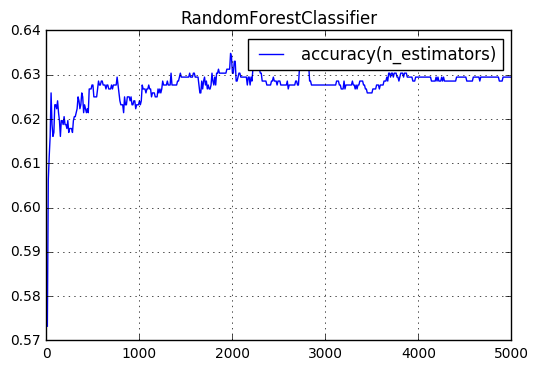

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier

winequality = np.array(pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';'))
np.random.shuffle(winequality)
X_train, X_test, y_train, y_test = train_test_split(winequality[:, :-1],
            winequality[:, -1], test_size=0.7, random_state=241)

clf = RandomForestClassifier(random_state=0, warm_start=True)

x, y = [], []
for i in range(500):
    clf.set_params(n_estimators = (i + 1) * 10)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    accur = accuracy_score(list(y_test), list(predicted))
    x.append((i + 1) * 10)
    y.append(accur)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, label = 'accuracy(n_estimators)')
ax.grid(True)
ax.legend()
plt.title('RandomForestClassifier')
plt.show()

Здесь вы можете поделиться мыслями о задании.

А здесь — вставить нарисованную вами смешную картинку.